***Name: SADDAM HUSSAIN***

***REG ID: GO_STP_6834***


---



---



# Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [ ]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Loan Amount
df.LoanAmount.fillna(df.LoanAmount.median(), inplace=True)

In [ ]:
# Loan Amount Term
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(), inplace = True)

In [ ]:
#df['Gender'] = df['Gender'].fillna(df['Gender'].mode)
df.Gender.fillna(df.Gender.value_counts().index[0], inplace = True)

In [ ]:
df.Married.fillna(df.Married.value_counts().index[0], inplace = True)
df.Dependents.fillna(df.Dependents.value_counts().index[0], inplace = True)

In [ ]:
df.Credit_History.fillna(df.Credit_History.value_counts().index[0], inplace = True)
df.Self_Employed.fillna(df.Self_Employed.value_counts().index[0], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Visualization

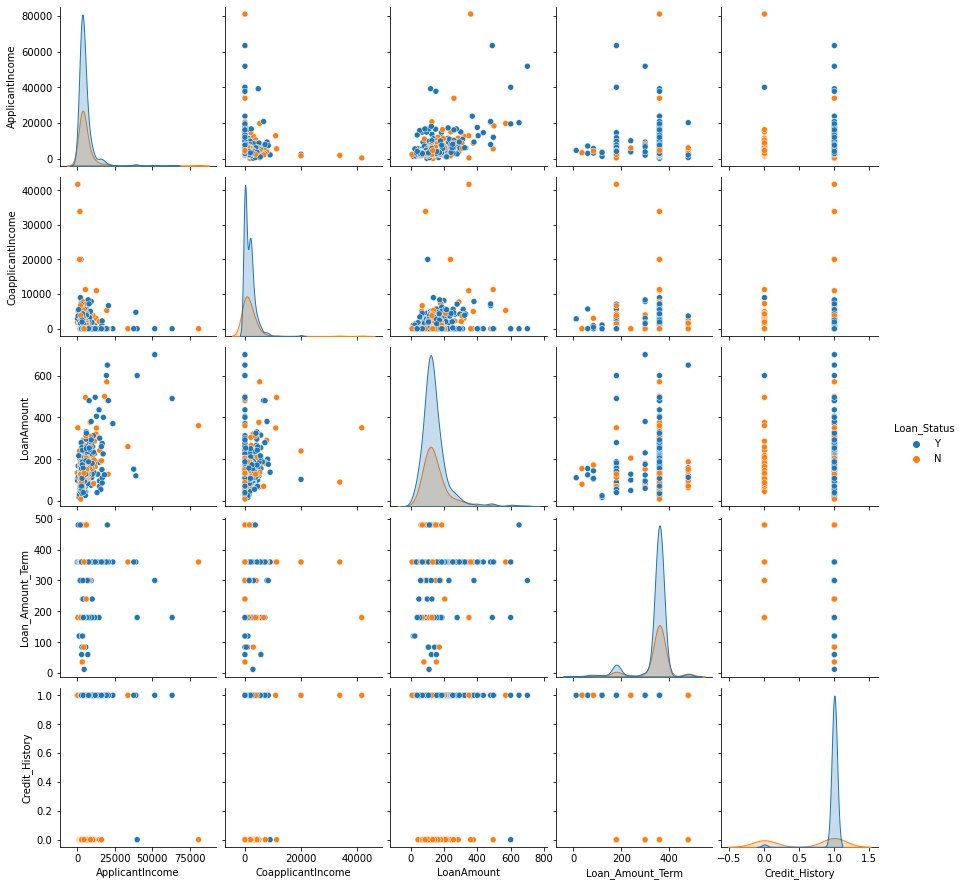

In [ ]:
sns.pairplot(df, hue = 'Loan_Status')

plt.show()

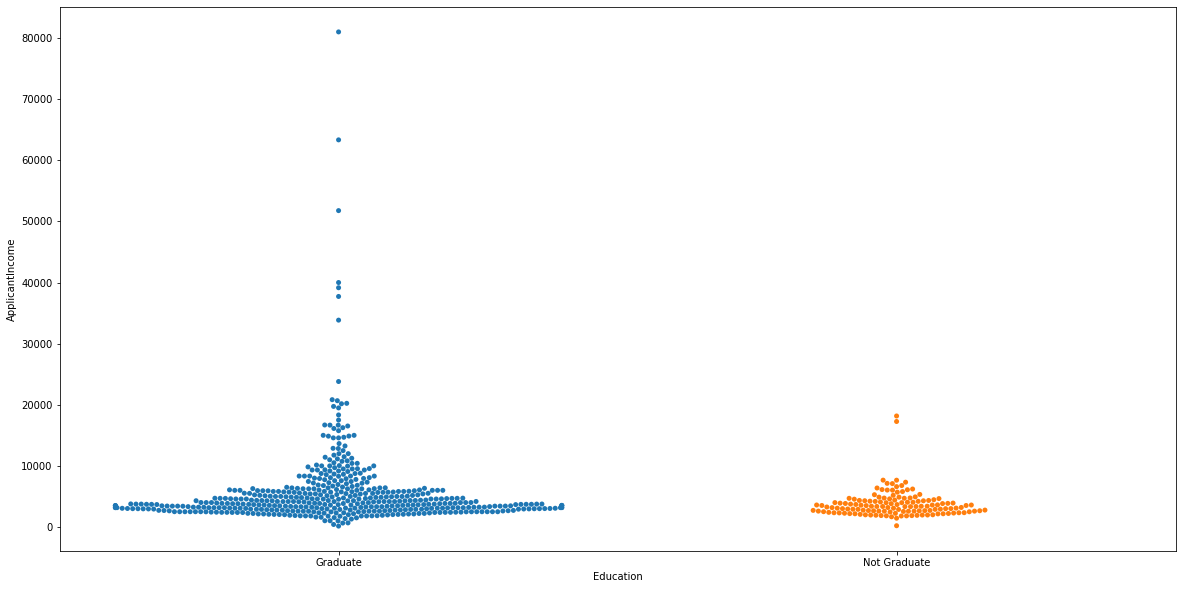

In [ ]:
plt.figure(figsize = (20,10))
sns.swarmplot(x = 'Education', y = 'ApplicantIncome', data = df)

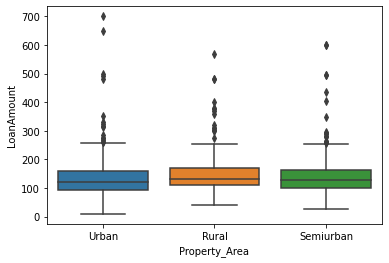

In [ ]:
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', data = df)

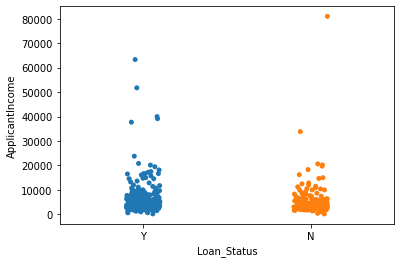

In [ ]:
sns.stripplot( x = 'Loan_Status', y = 'ApplicantIncome', data = df)

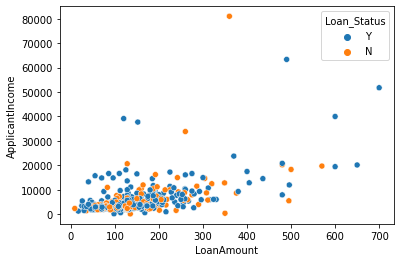

In [ ]:
sns.scatterplot(x = 'LoanAmount', y = 'ApplicantIncome',hue = 'Loan_Status', data = df)

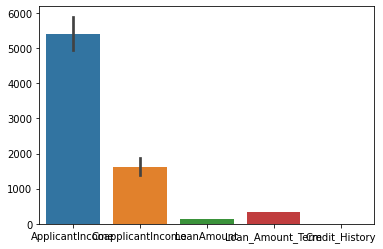

In [ ]:
sns.barplot(data = df)

# Data Conversion

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#df.Education.unique()
df.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype('int')

In [ ]:
df.Dependents.unique()

array([0, 1, 2, 3])

In [ ]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,2,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,2,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,2,1,1,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,2,1,0,0,0,1


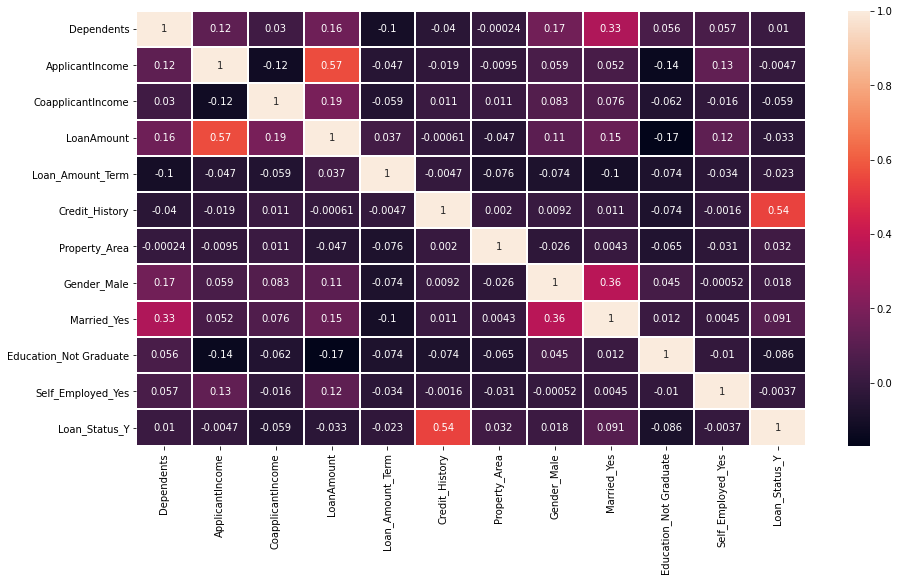

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=1)

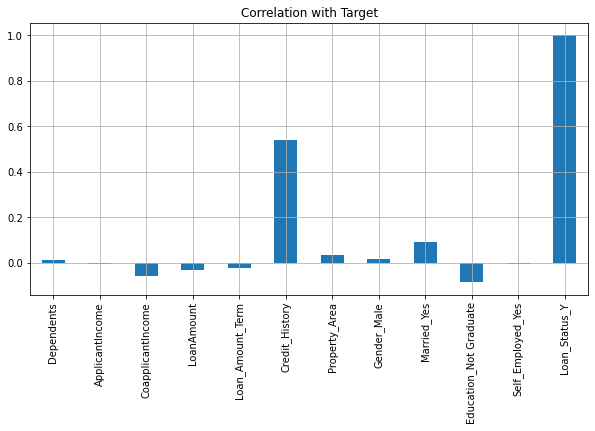

In [ ]:
df.corrwith(df['Loan_Status_Y']).plot.bar(figsize=(10,5),title = 'Correlation with Target', fontsize = 10, rot = 90,grid = True)

# Data Split

In [ ]:
X = df.drop('Loan_Status_Y', axis=1)
y = df.Loan_Status_Y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# Model - DT MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=5)

In [ ]:
model = dt.fit(X_train, y_train)

# Prediction

In [ ]:
y_pred = model.predict(X_test)

# Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7398373983739838

# Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[20, 20],
       [12, 71]])

In [ ]:
#Plot Decision tree
from sklearn import tree

[Text(143.51820652173913, 213.55714285714285, 'X[5] <= 0.5\ngini = 0.427\nsamples = 491\nvalue = [152, 339]'),
 Text(60.652173913043484, 205.79142857142858, 'X[2] <= 8115.0\ngini = 0.111\nsamples = 68\nvalue = [64, 4]'),
 Text(48.52173913043479, 198.0257142857143, 'X[3] <= 160.5\ngini = 0.087\nsamples = 66\nvalue = [63, 3]'),
 Text(38.81739130434783, 190.26, 'X[4] <= 240.0\ngini = 0.037\nsamples = 53\nvalue = [52, 1]'),
 Text(33.96521739130435, 182.4942857142857, 'X[0] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(29.11304347826087, 174.72857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(38.81739130434783, 174.72857142857143, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(43.66956521739131, 182.4942857142857, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(58.22608695652174, 190.26, 'X[3] <= 172.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(53.37391304347827, 182.4942857142857, 'X[6] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(4

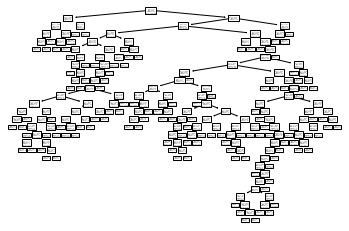

In [ ]:
tree.plot_tree(model)

# Text Representation

In [ ]:
text_representation = tree.export_text(model)

print(text_representation)

|--- feature_5 <= 0.50
|   |--- feature_2 <= 8115.00
|   |   |--- feature_3 <= 160.50
|   |   |   |--- feature_4 <= 240.00
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  240.00
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  160.50
|   |   |   |--- feature_3 <= 172.00
|   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  172.00
|   |   |   |   |--- class: 0
|   |--- feature_2 >  8115.00
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_2 <= 9650.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_3 <= 302.00
|   |   |   |   |--- feature_3 <= 85.50
|   |   |   |   |   |--- feature_3 <= 51.50
|   |   |   |   |   |   |--- cla